<b style="color:red">Run the cell below before you get started!</b>

In [1]:
from fds import *

<h1>Fossil fuels and global temperatures</h1>

For this analysis I will be using data collected by the National Oceanic and Atmospheric Administration (NOAA) and by Carbon Dioxide Information Analysis Center (CDIAC), both US governmental science organizations.

The NOAA data consists of <b>yearly global average temperatures</b>, more specifically, the total land-and-sea global average which combines temperature measurements from both land and sea. The average was around 13 °C in the last century although most datasets subtract this average to work with the deviation instead. This temperature is one of the main indicators for the warming of our planet in very recent history.

The CDIAC dataset (available <a href="https://datahub.io/core/co2-fossil-by-nation#readme">here</a>) lists <b>CO2-emissions from fossil fuels</b>, measured in thousand metric tons of carbon. The original dataset refines this data by nation and by type of fuel (solid, liquid, gas, etc.) but here we will only work with yearly totals.


The following code cell reads the dataset contained
in <code>01-resources/temp-vs-fossil.csv</code> and sort the columns ("Year", "Temp", "Emissions") into the corresponding lists(<code>years</code>,<code>temps</code>,<code>emissions</code>) for further analysis.
    

In [17]:
from fds import *
import csv

years = []
temps = []
emissions = []

with open('01-resources/temp-vs-fossil.csv', 'r') as f:
    it = iter(f)
    next(it)
    for l in it:
        l = l.strip()
        row = l.split(",")
        years.append(int(row[0]))
        temps.append(float(row[1]))
        emissions.append(int(row[2]))

The dataset provides yearly data on global average temperatures and CO2 emissions from fossil fuels spanning the years 1980 to 2014. Consisting of three columns: Year, Temperature(temps) and Emissions. The column 'year' represents calendar years stored as integers, 'Temps' denotes the global average temperature deviations from a baseline, recorded as floating-point numbers in degrees Celsius, and 'Emissions' indicates CO2 emissions from fossil fuels, stored as integers. Over the observed period, CO2 emissions exhibit a notable increasing trend, ranging from 13.78 in earlier years to 14.64 degrees Celsius in 2014. This suggests a concerning escalation in greenhouse gas emissions, aligning with broader concerns regarding climate change. 

In this section, I present the temporal analysis of global average temperatures from 1980 to 2014.

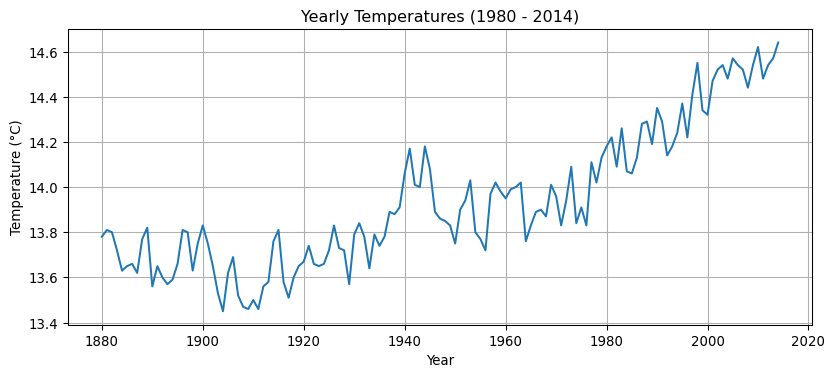

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,4), dpi=96)


ax.plot(years, temps) # Plot the yearly temperatures
ax.set_xlabel('Year') # Set the label for the x-axis
ax.set_ylabel('Temperature (°C)') # Set the label for the y-axis
ax.set_title('Yearly Temperatures (1980 - 2014)') #title
ax.grid(True) #add grid for better vizualization

plt.show()

<div class="]">
    <div class="no"></div>
    <div class="text">To understand the dynamics between anthropogenic activities and climate change, this segment of our analysis focuses on visualizing the trajectory of CO2 emissions from fossil fuels over the years 1980 to 2014.


</div>
</div>


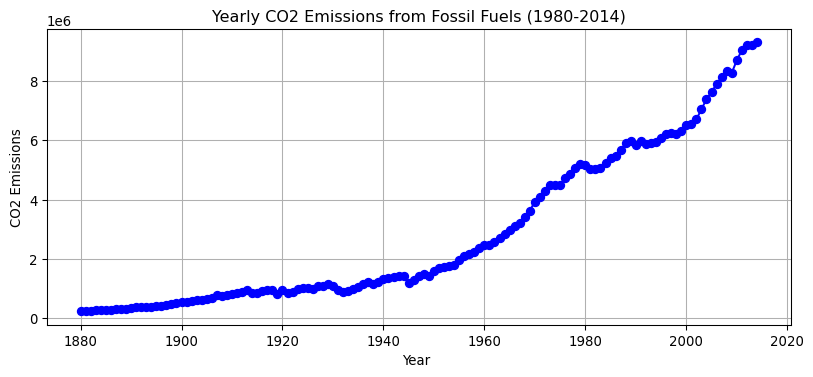

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,4), dpi=96)


ax.plot(years, emissions, color='blue', marker='o', linestyle='-') # Plot the CO2 emissions data with blue color, circular markers, and solid line
ax.set_title("Yearly CO2 Emissions from Fossil Fuels (1980-2014)") # Set the title of the plot
ax.set_xlabel('Year ') # Set the label for the x-axis
ax.set_ylabel('CO2 Emissions') # Set the label for the y-axis
ax.grid(True) # Enable grid lines on the plot for better visualization


plt.show() #Display plot


The following stage of my analysis, I focus on the statistical examination of the global average temperatures dataset. Understanding the central tendency and variability within this dataset is crucial for our investigation into climate trends. Therefore, we proceed to calculate two fundamental statistical metrics:

The Mean Global Average Temperature (tmean): This metric will enable us to ascertain the central or average temperature across the years under study, providing a baseline against which yearly deviations can be compared. The mean temperature is a pivotal reference point for assessing overall climate change and warming trends.

The Variance in Global Average Temperatures (tvar): By computing the variance, I aim to quantify the extent of temperature fluctuations around the mean. This measure of dispersion is essential for understanding the stability or volatility of global temperatures over time, offering insights into the range of temperature anomalies and their consistency.


In [20]:



tmean = float(sum(temps)) / len(temps) #mean calculation
tvar = float(sum((x - tmean)** 2 for x in temps)) / (len(temps)) #variance

print(f"tmean: ",tmean)
print(f" tvar " , tvar)

tmean:  13.934740740740736
 tvar  0.09346789574759941


I proceed to quantify the central tendency and dispersion of CO2 emissions data through the calculation of the mean and variance. These statistical measures are essential for understanding the overall distribution and variability of emissions over the studied period.

In [21]:



fmean = float(sum(emissions)) / float(len(emissions)) #mean calculation
fvar = sum((x - fmean)** 2 for x in emissions) / (len(emissions)) #variance

# fmean
fvar

6842427381767.991

The calculated mean global average temperature at approximately 13.93°C, with a relatively low variance, indicates a consistent upward trend in global temperatures across the years studied. This consistency points towards a gradual, yet persistent, escalation of global warming. Concurrently, the CO2 emissions showcase a mean value of approximately 2,860,001.09 metric tons, accompanied by a significant variance, highlighting the substantial fluctuations and overall increase in emissions over time. These fluctuations reflect the varying intensity of human activities contributing to greenhouse gas emissions, underscored by industrial growth and energy consumption patterns.


In [16]:

covar = sum((temps[i] - tmean) * (emissions[i] - fmean) for i in range(len(temps))) / (len(temps))

covar

720182.835652675

In the next phase of my investigation, I use the previously computed statistical measures—covariance (covar), and the variances of CO2 emissions (fvar) and global temperatures (tvar)—to calculate the Pearson correlation coefficient. This coefficient will quantify the strength and direction of the linear relationship between fossil fuel emissions and global temperatures.

In [7]:


import math #import math to use sqrt 

r = covar / math.sqrt(fvar * tvar) #formula for pearsons correlation
r

0.9005471067068571

The Pearson correlation coefficient is an important statistical tool used  for understanding how two variables relate to each other. When this coefficient approaches +1, it signals a strong positive relationship, while a value near -1 indicates a negative association. In our case, with a statistically derived coefficient of approximately 0.901, there's compelling evidence of a strong positive linear connection between CO2 emissions from fossil fuels and planetary temperature. This finding suggests a strong correlation between these variables, implying that as emissions rise, so does the global temperature. Essentially, the coefficient acts as a numerical compass, guiding us through the strength and direction of this relationship. With a coefficient nearing 1, it's clear that the bond between CO2 emissions and planetary temperature is both meaningful and impactful.

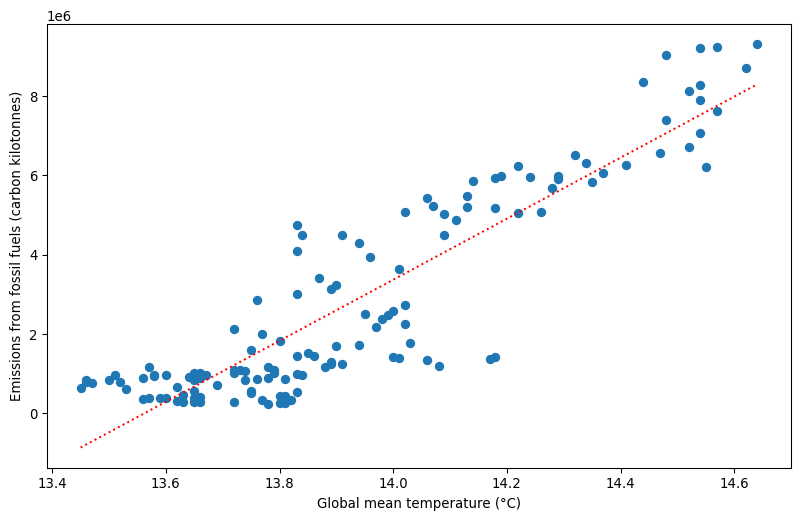

In [8]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10,6), dpi=96)

xs, ys = temps, emissions
plt.scatter(xs, ys)

a = covar / tvar
b = fmean - a * tmean

xmin, xmax = min(xs), max(xs)
plt.xlabel('Global mean temperature (°C)')
plt.ylabel('Emissions from fossil fuels (carbon kilotonnes)')
plt.plot([xmin,xmax], [a*xmin + b, a*xmax + b], color='red', ls=":")
pass

The Graph above ilustrates the fossil fuel emission against the changes in global mean temperatures. Observing along the x-axis (global mean temperature), there's a general trend of increasing y-values (emissions from fossil fuels). This suggests a positive correlation between global mean temperature and emissions from fossil fuels.
The linear regression line (represented by the dashed red line) illustrates this positive relationship. It shows the direction and magnitude of change in emissions from fossil fuels and change in global mean temperature.

Overall, the plot visually confirms the positive correlation between global mean temperature and emissions from fossil fuels, with the linear regression line providing an estimate of the trend in the data. 
Our findings resonate with and build upon existing research, such as the studies conducted by Boden et al. (2013), affirming that the consequences of fossil fuel emissions for global climate are not static but are likely to exacerbate over time. This continuity with previous research underscores the reliability of our analysis and the critical nature of the issue at hand.

In light of these findings, it is imperative that we consider not only the immediate implications for climate policy and emission reduction strategies but also the broader context of our relationship with the environment. The strong correlation between CO2 emissions and global temperature elevates the importance of transitioning towards sustainable energy sources, enhancing carbon capture technologies, and fostering global collaboration to combat climate change. Moreover, my  study highlights the necessity for ongoing research to monitor these trends, refine our understanding of the carbon cycle, and evaluate the effectiveness of mitigation efforts.
